## Perfect plot Time Series

In [1]:
#%load_ext nb_black
%load_ext pycodestyle_magic
%pycodestyle_on

In [2]:
from dateutil.parser import parse
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

plt.rcParams.update({"figure.figsize": (10, 7), "figure.dpi": 120})

# WYKRES POKAZUJE ZMIANY SEZONOWE W KAŻDYM ROKU

MUSZĄ BYĆ MIESIĄCE I MUSZĄ BYĆ LATA

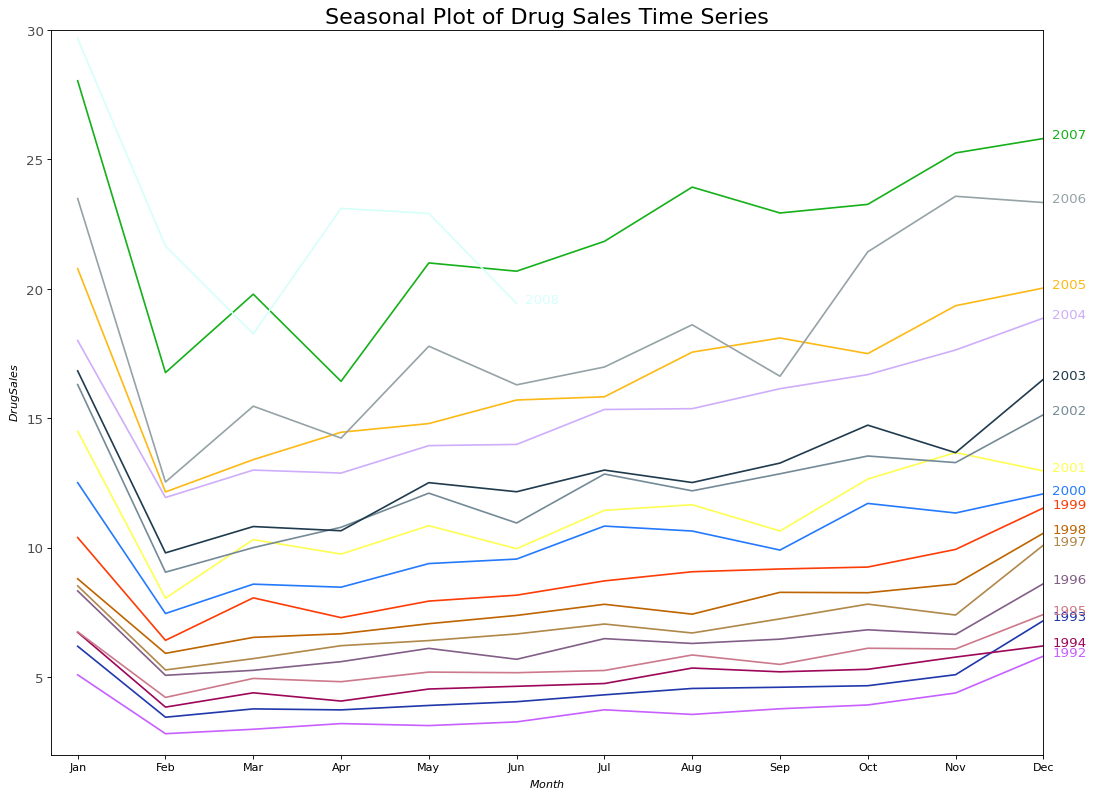

25:80: E501 line too long (86 > 79 characters)
36:80: E501 line too long (85 > 79 characters)


In [3]:
# Import Data
df = pd.read_csv(
    "https://raw.githubusercontent.com/selva86/datasets/master/a10.csv",
    parse_dates=["date"],
    index_col="date",
)
df.reset_index(inplace=True)

# Prepare data
df["year"] = [d.year for d in df.date]
df["month"] = [d.strftime("%b") for d in df.date]
years = df["year"].unique()

# Prep Colors
np.random.seed(100)
mycolors = np.random.choice(
    list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False
)

# Draw Plot
plt.figure(figsize=(16, 12), dpi=80)
for i, y in enumerate(years):
    if i > 0:
        plt.plot(
            "month", "value", data=df.loc[df.year == y, :], color=mycolors[i], label=y
        )
        plt.text(
            df.loc[df.year == y, :].shape[0] - 0.9,
            df.loc[df.year == y, "value"][-1:].values[0],
            y,
            fontsize=12,
            color=mycolors[i],
        )

# Decoration
plt.gca().set(xlim=(-0.3, 11), ylim=(2, 30), ylabel="$Drug Sales$", xlabel="$Month$")
plt.yticks(fontsize=12, alpha=0.7)
plt.title("Seasonal Plot of Drug Sales Time Series", fontsize=20)
plt.show()

In [96]:
df = pd.read_csv(
    "https://raw.githubusercontent.com/selva86/datasets/master/a10.csv",
    parse_dates=["date"],
    index_col="date",
)
df.dtypes

value    float64
dtype: object

In [81]:
df.shape

(204, 1)

In [97]:
df

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869
...,...
2008-02-01,21.654285
2008-03-01,18.264945
2008-04-01,23.107677


In [98]:
# Import Data
df = pd.read_csv(
    "https://raw.githubusercontent.com/selva86/datasets/master/a10.csv",
    parse_dates=["date"],
    index_col="date",
)
df.reset_index(inplace=True)

In [99]:
df

,date,value
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869
...,...,...
199,2008-02-01,21.654285
200,2008-03-01,18.264945
201,2008-04-01,23.107677
202,2008-05-01,22.912510


In [4]:
def sesonal_plot(df):

    # Prepare data
    # df["year"] = [d.year for d in df.date]
    # df["month"] = [d.strftime("%b") for d in df.date]
    years = df["year"].unique()

    # Prep Colors
    np.random.seed(100)
    mycolors = np.random.choice(
        list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False
    )

    # Draw Plot
    plt.figure(figsize=(16, 12), dpi=80)
    for i, y in enumerate(years):
        if i > 0:
            plt.plot(
                "month",
                "value",
                data=df.loc[df.year == y, :],
                color=mycolors[i],
                label=y,
            )
            plt.text(
                df.loc[df.year == y, :].shape[0] - 0.9,
                df.loc[df.year == y, "value"][-1:].values[0],
                y,
                fontsize=12,
                color=mycolors[i],
            )

    # Decoration
    plt.gca().set(
        xlim=(-0.3, 11), ylim=(2, 30), ylabel="$Drug Sales$", xlabel="$Month$"
    )
    plt.yticks(fontsize=12, alpha=0.7)
    plt.title("Seasonal Plot of Drug Sales Time Series", fontsize=20)
    plt.show()

# Energy.csv

In [82]:
df = pd.read_csv(
    "/home/wojciech/Perfect-Plots__GIP/Energy.csv",
    index_col=0, parse_dates=["Date"]
)
df.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


#### zmieniam nazwę z 'Date'na 'date'

In [83]:
csv = "/home/wojciech/Perfect-Plots__GIP/Energy.csv"
df.rename(columns={"Date": "date"}, inplace=True)
df.columns

Index(['date', 'Consumption', 'Wind', 'Solar', 'Wind+Solar'], dtype='object')

#### tworzę datę

In [11]:
df['date'] = df['date']

KeyError: 'date'

#### tworzę kolumny 'year' i 'month'

In [8]:
df["year"] = df['date'].dt.year
df["month"] = df['date'].dt.month

#### tworzę szereg czasowy z df

In [9]:
df.reset_index
df.set_index("date", inplace=True)

# sprawdzamy jak wygląda struktura danych

In [37]:
df = pd.read_csv("https://raw.githubusercontent.com/wtm695450085/Perfect-Plots__GIP/master/Energy.csv")
df.head(2)

,Unnamed: 0,Date,Consumption,Wind,Solar,Wind+Solar
0,0,2006-01-01,1069.184,NaN,NaN,NaN
1,1,2006-01-02,1380.521,NaN,NaN,NaN


1:80: E501 line too long (103 > 79 characters)


# Przygotowuję dane

In [84]:
# Import Data
df = pd.read_csv(
    "https://raw.githubusercontent.com/wtm695450085/Perfect-Plots__GIP/master/Energy.csv",
    usecols=[1, 2],
    names=['date', 'value'],
    header=0,
    parse_dates=['date']
)
df.head(3)

,date,value
0,2006-01-01,1069.184
1,2006-01-02,1380.521
2,2006-01-03,1442.533


3:80: E501 line too long (90 > 79 characters)


#### Tworze szereg czasowy

In [89]:
df.reset_index
df.set_index('date', inplace=True)

KeyError: "None of ['date'] are in the columns"

AttributeError: 'DataFrame' object has no attribute 'date'

17:80: E501 line too long (86 > 79 characters)
28:80: E501 line too long (85 > 79 characters)


### tworzę format daty

In [85]:
df.dtypes

date     datetime64[ns]
value           float64
dtype: object

In [86]:
df.shape

(4383, 2)

In [90]:
df_week = df.resample('W').sum(min_count=7)
df_week.tail(5)

,value
date,
2017-12-03,10753.65420
2017-12-10,10883.77462
2017-12-17,10806.99822
2017-12-24,10082.39681
2017-12-31,8422.85648


In [95]:
df_month = df.resample('M').sum(min_count=7)
df_month.tail(5)

,value
date,
2017-08-31,40029.77368
2017-09-30,40078.56092
2017-10-31,42355.21893
2017-11-30,44339.72455
2017-12-31,44511.10431


In [100]:
df_month.reset_index(inplace=True)

In [102]:
# Prepare data
df_month["year"] = [d.year for d in df.date]
df_month["month"] = [d.strftime("%b") for d in df.date]
years = df["year"].unique()

# Prep Colors
np.random.seed(100)
mycolors = np.random.choice(
    list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False
)

# Draw Plot
plt.figure(figsize=(16, 12), dpi=80)
for i, y in enumerate(years):
    if i > 0:
        plt.plot(
            "month", "value", data=df.loc[df.year == y, :], color=mycolors[i], label=y
        )
        plt.text(
            df.loc[df.year == y, :].shape[0] - 0.9,
            df.loc[df.year == y, "value"][-1:].values[0],
            y,
            fontsize=12,
            color=mycolors[i],
        )

# Decoration
plt.gca().set(xlim=(-0.3, 11), ylim=(2, 30), ylabel="$Drug Sales$", xlabel="$Month$")
plt.yticks(fontsize=12, alpha=0.7)
plt.title("Seasonal Plot of Drug Sales Time Series", fontsize=20)
plt.show()

ValueError: Length of values (204) does not match length of index (144)

17:80: E501 line too long (86 > 79 characters)
28:80: E501 line too long (85 > 79 characters)


### tworzę dwie dodatkowe kolumny

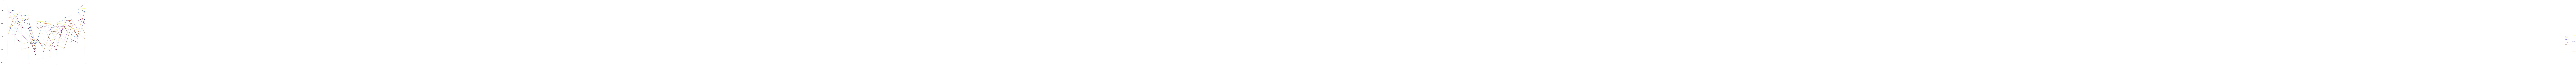

6:80: E501 line too long (86 > 79 characters)


In [76]:
# Draw Plot
plt.figure(figsize=(16, 12), dpi=80)
for i, y in enumerate(years):
    if i > 0:
        plt.plot(
            "month", "value", data=df.loc[df.year == y, :], color=mycolors[i], label=y
        )
        plt.text(
            df.loc[df.year == y, :].shape[0] - 0.9,
            df.loc[df.year == y, "value"][-1:].values[0],
            y,
            fontsize=12,
            color=mycolors[i],
        )

plt.show()